<a href="https://colab.research.google.com/github/amIhumann/Kuliah/blob/main/Pertemuan7_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

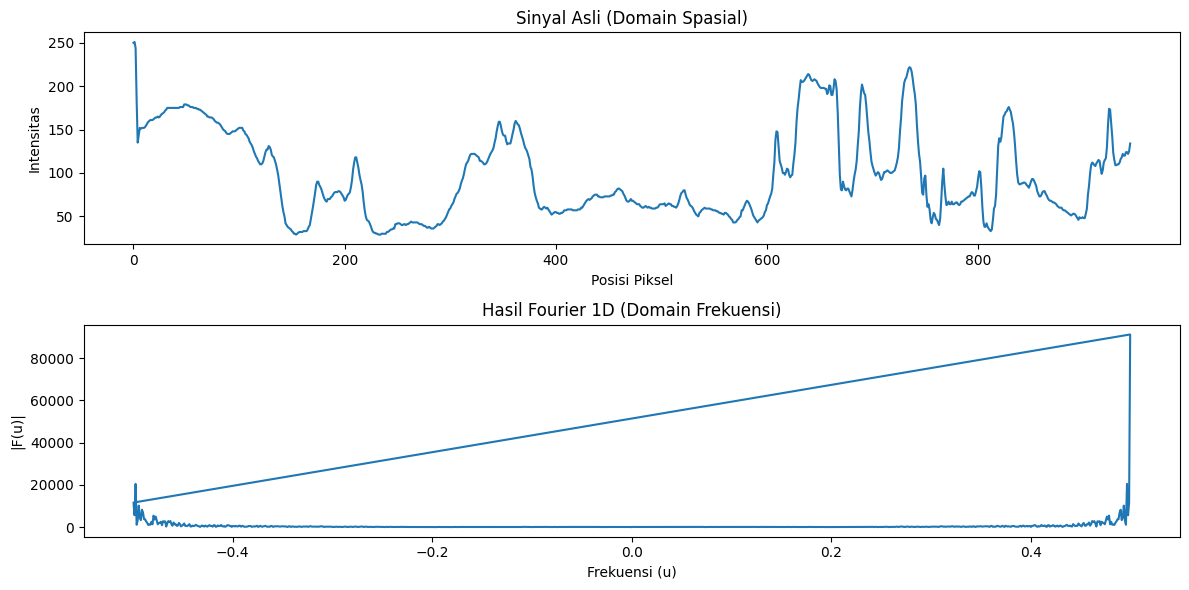

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('tomat.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

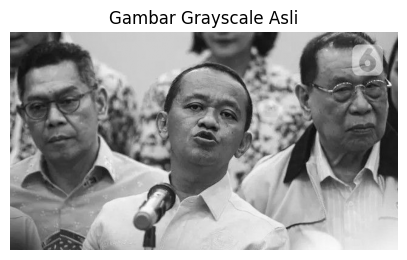

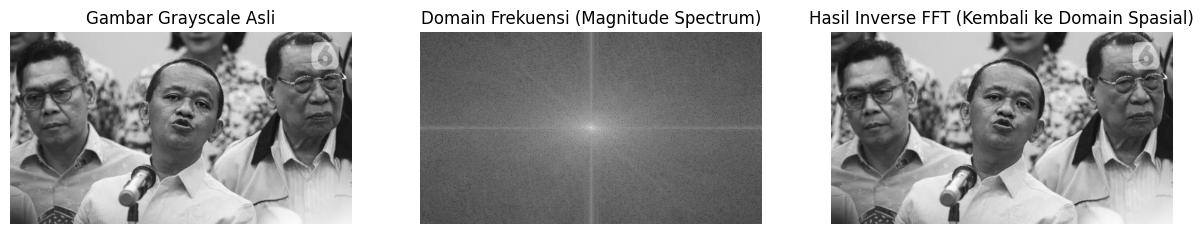

In [6]:
# =====================================
# 1. Import library
# =====================================
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# =====================================
# 2. Baca gambar dari direktori lokal
# =====================================
# Ganti nama file sesuai gambar kamu
image_path = 'bahlil.jpg'   # contoh path

# Buka gambar dan ubah ke grayscale
img = Image.open(image_path).convert('L')

# Tampilkan gambar asli
plt.figure(figsize=(5,5))
plt.title("Gambar Grayscale Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Ubah ke array numpy
img_array = np.array(img)

# =====================================
# 3. Transformasi Fourier 2D (FFT)
# =====================================
# FFT 2D
f_transform = np.fft.fft2(img_array)

# Geser frekuensi rendah ke tengah (lebih mudah dibaca)
f_shift = np.fft.fftshift(f_transform)

# Hitung magnitude spectrum (pakai log supaya terlihat)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

# =====================================
# 4. Inverse FFT (kembali ke domain spasial)
# =====================================
# Balik shift-nya
f_ishift = np.fft.ifftshift(f_shift)

# Inverse FFT
img_reconstructed = np.fft.ifft2(f_ishift)
img_reconstructed = np.abs(img_reconstructed)

# =====================================
# 5. Visualisasi hasil
# =====================================
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Gambar Grayscale Asli")
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Domain Frekuensi (Magnitude Spectrum)")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Hasil Inverse FFT (Kembali ke Domain Spasial)")
plt.imshow(img_reconstructed, cmap='gray')
plt.axis('off')

plt.show()


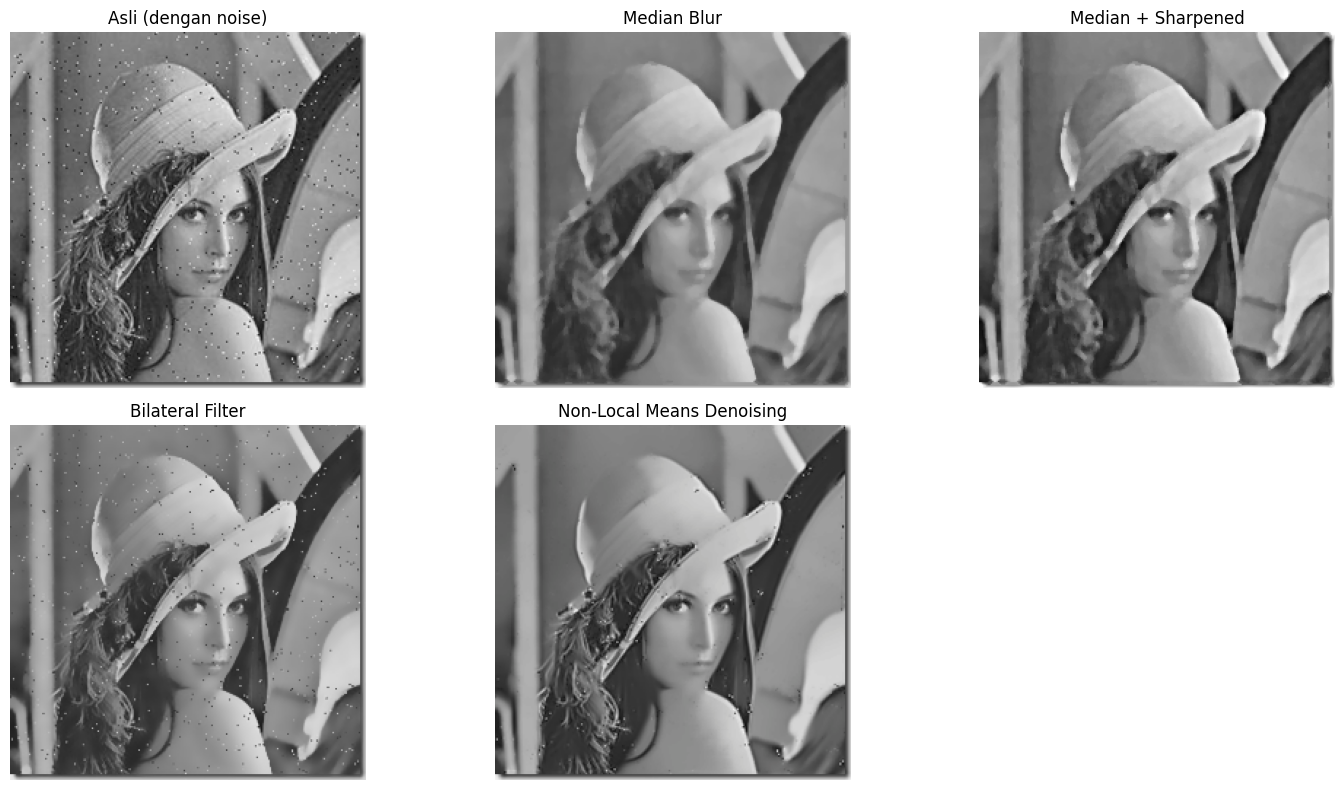

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. BACA GAMBAR DARI DIRECTORY COLAB ===
# Pastikan gambar "salt-n-pepper-noise.png" sudah di-upload ke direktori kerja Colab
img = cv2.imread("noise.png")

# Cek apakah gambar ditemukan
if img is None:
    raise FileNotFoundError("⚠️ Gambar 'salt-n-pepper-noise.png' tidak ditemukan di direktori kerja Colab!")

# === 2. METODE 1: Median Filter ===
median = cv2.medianBlur(img, 5)

# === 3. METODE 2: Unsharp Masking (tajamkan hasil median) ===
gaussian = cv2.GaussianBlur(median, (9, 9), 10.0)
sharpened = cv2.addWeighted(median, 1.5, gaussian, -0.5, 0)

# === 4. METODE 3: Bilateral Filter (menjaga tepi tetap tajam) ===
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

# === 5. METODE 4: Non-Local Means Denoising (metode canggih, halus & natural) ===
nl_means = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

# === 6. TAMPILKAN SEMUA HASIL SECARA VISUAL ===
titles = [
    "Asli (dengan noise)",
    "Median Blur",
    "Median + Sharpened",
    "Bilateral Filter",
    "Non-Local Means Denoising"
]
images = [img, median, sharpened, bilateral, nl_means]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
